# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1303 Коренев Данил. Вариант №11.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Введу основные обозначения:
* $\lambda \left(n\right) = \left\lfloor\mathrm{lb} \left(n\right)\right\rfloor$ $-$ уменьшенная на единицу бинарная запись числа $n$;
* $\nu \left(n\right)$ - вес Хэмминга для бинарной записи числа $n$;

### Бинарный метод "SX"
Алгоритм возведения $x$ в степень $n$:
1. Вычислить $\lambda \left(n\right)$
2. Провести замену в записи $\lambda \left(n\right)$:  
$a_{i} = 1 \Rightarrow a = SX$  
$a_{i} = 0 \Rightarrow a = S$
3. Вычислить $res = x^{n}$ начиная с $res = x$. Рассматривать слева направо запись $\lambda \left(n\right)$ после замены на $S$ и $SX$:  
$a_{i} = S \Rightarrow res = res^{2}$  
$a_{i} = X \Rightarrow res = res \cdot x$  

Число операций для метода $SX$: $\lambda \left(n\right) + \nu \left(n\right) - 1$

 ### Бинарный метод справа налево  
 Алгоритм возведения $x$ в степень $n$ с помощью метода справа налево
 1. Задать переменным значения: $N = n, Y = 1, Z = x$  
 2. В цикле с условием окончания $N = 0$ использовать следующие операции:  
     A. Если $N$ четное  
     I. Присвоить $N = \left\lfloor\mathrm{\frac{N}{2}}\right\rfloor$  
     B. Если $N$ нечетное  
     I.  Присвоить $N = \left\lfloor\mathrm{\frac{N}{2}}\right\rfloor$
     II.  Присвоить $Y = Z \cdot Y$  
     III. Если $N = 0$ выйти из цикла    
     С. $Z = Z \cdot Z$  
 3. $Y$ - ответ  
 Число операций для метода справа налево: $\lambda \left(n\right) + \nu \left(n\right)$

### Метод множителей:

Алгоритм возведения $x$ в степень $n$ методом множителей:
1. Представить $n$ в виде $n = p \cdot q $, где $ p $ - минимальный простой множитель $n$, $q > 1$, получаем $x^n = (x^p)^q$ 
2. Если $n$ - простое, то необходимо вычислить $x^{n-1}$ и домножить на $ x $, получаем $x^{n} = x^{n-1} \cdot x$
3. Если $ n = 1$, то результат возведения $x$ в степень $n$ был найден, необходимо выйти из рекурсии алгоритма

### Дерево степеней

Алгоритм построения дерева степеней:
1. На нулевом уровне имеется единственный узел - корень дерева - 1
2. Уровень $i$ строиться следующим образом: к каждому узлу $\upsilon$ добавляются новые узлы: $\upsilon + a_{0}, \upsilon + a_{1},...,\upsilon + a_{i-1}$, если они не присутствовали ранее в дереве

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1. Бинарный метод "SX"

Реализую функцию sx(n), возводящая $x$ в степень $n$ методом SX. Функция принимает число n - степень, в которую необходимо возвести $x$. В случае, если оно больше 0, построить бинарную запись и отрезать старший бит, сделать соответствующие замены. Итеративно пройти по полученной строке и в зависимости от символа умножить result на саму себя, если встретилась S или на $x$, если встретился X.

In [1]:
def sx(n):
    result = x
    if n < 1:
        return 1
    n_bin = str(bin(n))[3:]
    sx_string = n_bin.replace('0', 's').replace('1', 'sx')
    print(sx_string)
    iterations = 0
    for i in sx_string:
        iterations += 1
        print(f"{iterations})", end = " ")
        if i == 'x':
            print(f"{result} * x".ljust(12), end = "")
            result *= x
        else:
            print(f"{result} * {result}".ljust(12), end = "")
            result *= result
        print(f" = {result}")

sx(17)

ssssx
1) x * x        = x^2
2) x^2 * x^2    = x^4
3) x^4 * x^4    = x^8
4) x^8 * x^8    = x^16
5) x^16 * x     = x^17


In [2]:
sx(27)

sxssxsx
1) x * x        = x^2
2) x^2 * x      = x^3
3) x^3 * x^3    = x^6
4) x^6 * x^6    = x^12
5) x^12 * x     = x^13
6) x^13 * x^13  = x^26
7) x^26 * x     = x^27


In [3]:
sx(32)

sssss
1) x * x        = x^2
2) x^2 * x^2    = x^4
3) x^4 * x^4    = x^8
4) x^8 * x^8    = x^16
5) x^16 * x^16  = x^32


Проверка результатов полученных на практике с теоретическими:

1)  $𝑛 = 17:𝜆(𝑛)=4;𝜈(𝑛)=2;𝜆(𝑛)+𝜈(𝑛)-1= 5$ − верно  
2)  $𝑛 = 27:𝜆(𝑛)=4;𝜈(𝑛)=4;𝜆(𝑛)+𝜈(𝑛)-1= 7$ − верно  
3)  $𝑛 = 32:𝜆(𝑛)=5;𝜈(𝑛)=1;𝜆(𝑛)+𝜈(𝑛)-1= 5$ − верно  

Результаты совпали, значит формула для оценки операций корректна.

**Вывод**  
Был реализован метод SX для возведения числа в степень. На практике проверена формула оценки количества операций для метода SX.

### 2. Метод возведения справа налево  
Реализую функцию right_to_left(n), возводящая $x$ в степень $n$ методом справа налево. Сначала инициализируются переменные $N = n, Y = 1, Z = x$. Далее в цикле while с условием $n != 0$ необходимо в зависимости от четности $n$ провести следующие действия:  
    1. $n$ четно - уменьшить $n$ вдвое  
    2. $n$ нечетно - уменьшить $n$ вдвое (с округлением вниз), умножить $y$ на $z$, увеличить счетчик итераций.  
    В любом случае умножить $z$ на себя и увеличить счетчик итераций.

In [4]:
def right_to_left(n):
    iterations = 0
    y = 1
    z = x
    while n != 0:
        if n % 2 == 1:
            n = floor(n / 2)
            y *= z
            iterations += 1
            print(f'i = {iterations}'.ljust(10), f'N = {n}'.ljust(10), f'Y = {y}'.ljust(10), f'Z = {z}'.ljust(10))
            if n == 0:
                break
        else:
            n = floor(n / 2)
        z *= z
        iterations += 1
        print(f'i = {iterations}'.ljust(10), f'N = {n}'.ljust(10), f'Y = {y}'.ljust(10), f'Z = {z}'.ljust(10))
    return y

right_to_left(17)

i = 1      N = 8      Y = x      Z = x     
i = 2      N = 8      Y = x      Z = x^2   
i = 3      N = 4      Y = x      Z = x^4   
i = 4      N = 2      Y = x      Z = x^8   
i = 5      N = 1      Y = x      Z = x^16  
i = 6      N = 0      Y = x^17   Z = x^16  


x^17

| i | N  | Y    | Z    |
|---|----|------|------|
| 0 | 17 | 1    | x    |
| 1 | 8  | x    | x    |
| 2 | 8  | x    | x^2  |
| 3 | 4  | x    | x^4  |
| 4 | 2  | x    | x^8  |
| 5 | 1  | x    | x^16 |
| 6 | 0  | x^17 | x^16 |

In [5]:
right_to_left(27)

i = 1      N = 13     Y = x      Z = x     
i = 2      N = 13     Y = x      Z = x^2   
i = 3      N = 6      Y = x^3    Z = x^2   
i = 4      N = 6      Y = x^3    Z = x^4   
i = 5      N = 3      Y = x^3    Z = x^8   
i = 6      N = 1      Y = x^11   Z = x^8   
i = 7      N = 1      Y = x^11   Z = x^16  
i = 8      N = 0      Y = x^27   Z = x^16  


x^27

| i | N  | Y    | Z    |
|---|----|------|------|
| 0 | 27 | 1    | x    |
| 1 | 13 | x    | x    |
| 2 | 13 | x    | x^2  |
| 3 | 6  | x^3  | x^2  |
| 4 | 6  | x^3  | x^4  |
| 5 | 3  | x^3  | x^8  |
| 6 | 1  | x^11 | x^8  |
| 7 | 1  | x^11 | x^16 |
| 8 | 0  | x^27 | x^16 |

In [6]:
right_to_left(32)

i = 1      N = 16     Y = 1      Z = x^2   
i = 2      N = 8      Y = 1      Z = x^4   
i = 3      N = 4      Y = 1      Z = x^8   
i = 4      N = 2      Y = 1      Z = x^16  
i = 5      N = 1      Y = 1      Z = x^32  
i = 6      N = 0      Y = x^32   Z = x^32  


x^32

| i | N  | Y    | Z    |
|---|----|------|------|
| 0 | 32 | 1    | x    |
| 1 | 16 | 1    | x^2  |
| 2 | 8  | 1    | x^4  |
| 3 | 4  | 1    | x^8  |
| 4 | 2  | 1    | x^16 |
| 5 | 1  | 1    | x^32 |
| 6 | 0  | x^32 | x^32 |

Проверка результатов полученных на практике с теоретическими:

1)  $𝑛 = 17:𝜆(𝑛)=4;𝜈(𝑛)=2;𝜆(𝑛)+𝜈(𝑛) = 6$ − верно  
2)  $𝑛 = 27:𝜆(𝑛)=4;𝜈(𝑛)=4;𝜆(𝑛)+𝜈(𝑛) = 8$ − верно  
3)  $𝑛 = 32:𝜆(𝑛)=5;𝜈(𝑛)=1;𝜆(𝑛)+𝜈(𝑛) = 6$ − верно  

Результаты совпали, значит формула для оценки операций корректна.

**Вывод**  
Был реализован метод справа налево возведения числа в степень. На практике проверена формула оценки количества операций для данного метода.

### 3. Сравнение бинарного метода SX и метода возведения слева направо числа в степень

Число операций в методе справа налево больше, чем в методе SX. Число итераций в методе справа налево оценивается $ \lambda (n) + \nu (n)$, а в методе SX число итераций равно $ \lambda (n) + \nu (n) - 1$. А значит бинарный метод SX быстрее метода слева направо на одну итерацию.

### 4. Метод множителей  

Рассмотрим метод множителей на примерах:

1. Пусть $n = 17$                                                      
    Так как $17$ - простое число, то вычислим $x^{17} = x^{16} \cdot x $ - 1 операция  
    Число $16$ можно представить как $8 \cdot 2$ поэтому $x^{16} = (x^{8})^{2}$ - 1 операция  
    Далее $8 = 4 \cdot 2$, поэтому $x^{8} = (x^{4})^{2}$ - 1 операция
    Далее $4 = 2 \cdot 2$, поэтому $x^{4} = (x^{2})^{2} = x^{2} \cdot x^{2}$ - 1 операция  
    Остается $x^{2} = x \cdot x$ - 1 операция  
    
    **всего 5 операций**
     
2. Пусть $n = 27$  
    Так как $27$ представимо как $3 \cdot 9$, то $x^{27} = (x^{3})^{9}$  
    Для начала вычислю $x^3 = x^2 \cdot x$ - 1 операция  
    Выражу $x^{2} = x \cdot x$ - 1 операция   
    Получил, что для возведения $x$ в степень $3$ нужно 2 операции.  
    Теперь вычислю сколько нужно операций, чтобы возвести $x^{3} = y$ в степень $9$  
    Число $9$ представимо как $3 \cdot 3$ поэтому $y^{9} = (y^3)^3$, возведение в $3$ степень занимает 2 операции, тогда возведение в 9 степень занимает $4$ операции.  
    Имеем, чтобы возвести $x$ в степень $27$ необходимо $2 + 4 = 6$ операций   
    
    **всего 6 операций**  
      
3. Пусть $n = 32$  
    Так как $32$ представимо во как $2 \cdot 16$, то $x^{32} = (x^2)^{16}$ - 1 операция  
    Возведение $x$ в степень $2$ требует одной операции. Поэтому теперь надо рассмотреть возведение $x^2 = y$ в степень 16  
    Число $16$ представимо как $2 \cdot 8$, поэтому $y^{16} = (y^2)^8$. Возведение в степень $2$ занимает 1 операцию
    Число $8$ представимо как $2 \cdot 4$, поэтому $(y^{2})^{8} = z^8 = (z^2)^4$. Возведение в степень $2$ занимает 1 операцию  
    Число $4$ представимо как $2 \cdot 2$, поэтому $(z^{2})^{4} = w^4 = (w^2)^2$. Это занимает 2 операции  
    **всего 5 операций**
    

4. Рассмотрю пример, когда метод множителей дает результат хуже sx
    Пусть $n = 33$:  
    $x^{33} = \left(x^3\right)^{11}$ имеем из нижеизложенного 2 + 5 = 7 операций    
    $x^{11} = x^{10} \cdot x$ - 1 операция  
    $x^{10} = \left(x^2\right)^{5}$ - 1 операция  
    $x^{5} = x^{4} \cdot x$ - 1 операция  
    $x^{4} = \left(x^2\right)^{2}$ - 2 операции  
    $x^{3} = x^2 \cdot x$ - 1 операция  
    $x^{2} = x\cdot x$ - 1 операция  
    **всего 7 операций**  
    В методе $SX$ этот метод занимает $𝑛 = 33:𝜆(𝑛)=5;𝜈(𝑛)=2;𝜆(𝑛)+𝜈(𝑛)-1= 6$ операций

**Вывод**

Рассмотрен метод множителей для нескольких степеней n. В сравнении с методом $SX$ для некоторых степеней рассмотренный метод работает быстрее метода $SX$, а для некоторых быстрее, поэтому нельзя однозначно сказать, какой из методов быстрее.

### 5. Построение дерева степеней

Создам функцию tree_degrees(k), которая будет строить уровни до k-го уровня. Дерево представлено в виде словаря {вершина: список родителей}. Проходясь по всем уровням, просматриваем все возможные новые элементы, которые можем добавить на следующий уровень.

In [7]:
def tree_degrees(k):
    tree = {1: [1]}
    node = [1]
    for level in range(k):
        node_new = []
        for elem in node:
            for parent in tree[elem]:
                tmp = elem + parent
                if tmp not in tree:
                    node_new.append(tmp)
                    tree[tmp] = tree[elem] + [tmp]
        node = node_new
        
    tree[1] = []
    for elem in tree:
        if len(tree[elem] )> 1:
            tree[elem] = [tree[elem][-2]]
    return tree


tr = tree_degrees(6)
tr

{1: [],
 2: [1],
 3: [2],
 4: [2],
 5: [3],
 6: [3],
 8: [4],
 7: [5],
 10: [5],
 9: [6],
 12: [6],
 16: [8],
 14: [7],
 11: [10],
 13: [10],
 15: [10],
 20: [10],
 18: [9],
 24: [12],
 17: [16],
 32: [16],
 19: [14],
 21: [14],
 28: [14],
 22: [11],
 23: [13],
 26: [13],
 25: [15],
 30: [15],
 40: [20],
 27: [18],
 36: [18],
 48: [24],
 33: [17],
 34: [17],
 64: [32]}

Для визуализации дерева степеней, напишу функцию show_tree(tree, node = None)

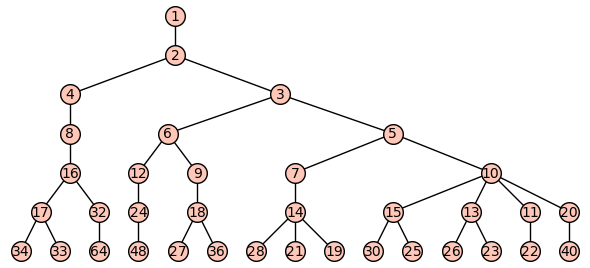

In [8]:
def show_tree(tree, node=None):
    outputGraph = Graph(tree)
    graph = outputGraph.plot(layout = 'tree', tree_root = 1)
    graph.show()
    
show_tree(tr)

Данное дерево позволяет быстро возводить $x$ в некоторую степень $n$. Например при $n = 23$ путь от корня дерева (1) до узла (23) будет [1, 2, 3, 5, 10, 13, 23]. Это значит, что цепочка вычисления $x^{23}$ будет выглядеть следующим образом: $x, x^{2}, x^{3}, x^{5}, x^{10}, x^{13}, x^{23}$ - 6 операций.  
  
Проведу сравнение: в методе SX для этого потребовалось бы $𝑛 = 23:𝜆(𝑛)=4;𝜈(𝑛)=4;𝜆(𝑛)+𝜈(𝑛)-1= 7$ операций, а в методе справа налево - 8 операций.  
  
**Вывод**   

Был реализован метод дерева степеней, найдена цепочка операций для n = 23.
Метод дерева степеней может быть быстрее метода $SX$.

## Выводы

Были сформированы знания о работе алгоритмов вычисления одночленов за минимальное число операций, привит навык использования систем компьютерной математики для реализации алгоритмов.

Реализованы: бинарный метод SX, метод справа-налево, метод множителей и метод степеней. Методы были сравнены по количеству итераций, была проведена теоретическая оценка сложности.